In [1]:
import Plots
Plots.pyplot();

In [2]:
# probability for exploration
EPSILON = 0.5

# step size
ALPHA = 0.5

# gamma for Q-Learning and Expected Sarsa
GAMMA = 1

# all possible actions
HIT = 1
STAND = 2
ACTIONS = [HIT,STAND]
# [x,y,z,d]
# x valor mano jugador 2:22
# y numero cartas jugador 
# z 0 si no ha ganado, 1 si ya gano
# d valor mano dealer 2:22
# initial state action pair values


2-element Array{Int64,1}:
 1
 2

In [3]:
function START()
    state = [0,1,1,0]
    new_card_player = rand([1,2,3,4,5,6,7,8,9,10,10,10,10])
    new_card_dealer = rand([1,2,3,4,5,6,7,8,9,10,10,10,10])
    if new_card_player == 1
        state[1] += 11
    else
        state[1] += new_card_player
    end
    if new_card_dealer == 1
        state[4] += 11
    else
        state[4] += new_card_dealer
    end
    return state
end

START (generic function with 1 method)

In [4]:
function step(last_state, action)
    x, y, z, d = last_state
    state = [x, y, z, d]
    if action == HIT
        new_card = rand([1,2,3,4,5,6,7,8,9,10,10,10,10])
        if new_card == 1
            if state[1] + 11 < 22
                state[1] += 11
            else
                state[1] += 1
            end
        else
            state[1] += new_card
        end
        state[2] += 1
        if state[1] > 21
            return START(), -100
        elseif state[2] == 4
            state[3] = 2
        end
        return state, -1
    elseif action == STAND
        cards = 1
        for i in 1:3
            cards += 1
            new_card = rand([1,2,3,4,5,6,7,8,9,10,10,10,10])
            if new_card == 1
                if state[4] + 11 <22
                    state[4] += 11
                else
                    state[4] +=1
                end
            else
                state[4] += new_card
            end
            if state[4] > 21
                state[4] = 22
                break
            elseif state[4] > 16
                break
            end
        end
        if cards == 4 && state[4] <= 21
            return START(), -100
        elseif state[4] > state[1]
            return START(), -100
        elseif state[4] > 21
            state[3] = 2
        end            
    end
    return state, -1
end

step (generic function with 1 method)

In [5]:
function q_learning(q_value, step_size = ALPHA)
    state = START()
    rewards = 0.0
    while state[3] != 2
        action = choose_action(state, q_value)
        next_state, reward = step(state, action)
        rewards += reward
        # Q-Learning update
        q_value[state[1], state[2],state[3],state[4], action] += step_size * (
                reward + GAMMA * maximum(q_value[next_state[1], next_state[2], next_state[3], next_state[4], :]) -
                q_value[state[1], state[2], state[3], state[4], action])
        state = next_state
    end
    return rewards
end

q_learning (generic function with 2 methods)

In [6]:
function choose_action(state, q_value)
    if rand(1)[1] < EPSILON
        return ACTIONS[rand(1:2)]
    else
        values_ = q_value[state[1], state[2], state[3], state[4], :]
        action = []
        for i in enumerate(values_)
            action_,value_ = i
            if value_ == maximum(values_)
                push!(action,action_)
            end
        end
        action = action[rand(1:length(action))]
        return action
    end
end

choose_action (generic function with 1 method)

In [11]:
episodes = 5000
runs = 50
rewards_q_learning = zeros(episodes)

q_q_learning = []

for r in 1:runs  
    q_q_learning = zeros(21, 4, 2, 21, 2)

    for i in 1:episodes
        rewards_q_learning[i] += q_learning(q_q_learning)

    end
end

rewards_q_learning /= runs
println("xd")


xd


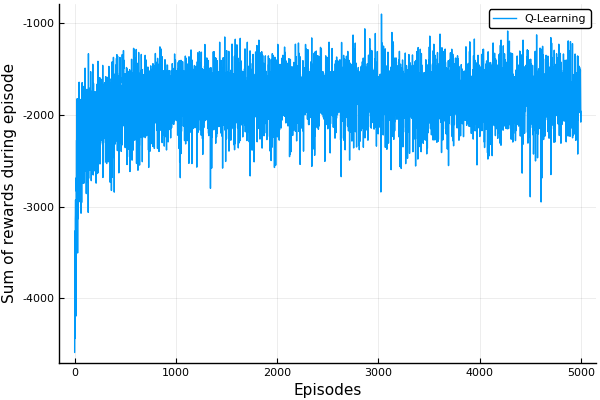

In [12]:
# draw reward curves
Plots.plot(rewards_q_learning, label="Q-Learning", fmt = :png)
Plots.xaxis!("Episodes")
Plots.yaxis!("Sum of rewards during episode")